In [122]:
%pip install psycopg2-binary
%pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [123]:
import psycopg2
import seaborn as sns
import pandas as pd
import squarify 
import matplotlib.pyplot as plt

In [151]:
conn = psycopg2.connect(
    dbname = 'salary_analysis_data_job_positions',
    user = 'postgres',
    password = 'Amir3525',
    host = 'localhost',
    port = '5432'
)

cur = conn.cursor()
print("Connected to the database")

Connected to the database


In [ ]:
cur.execute("SELECT * FROM salaries s LIMIT 10;")
rows = cur.fetchall()

for row in rows:
    print(rows)

# BASIC STATISTICS
### COUNTING TOTAL QUANTITY of DISTINCT job positions


### Ploting - Quantity of data job positions

In [ ]:
cur.execute("""
SELECT
	COUNT(DISTINCT s.job_title)
FROM
	salaries s
""")
rows = cur.fetchall()

for row in rows:
    print("The number of different job positions is: ",rows)
    


The number of different job positions is:  [(312,)]


('Data Scientist', 13156)
('Data Engineer', 10883)
('Software Engineer', 9596)
('Data Analyst', 8652)
('Machine Learning Engineer', 6443)
('Engineer', 5344)
('Manager', 3488)
('Research Scientist', 2553)
('Analyst', 2066)
('Applied Scientist', 1778)


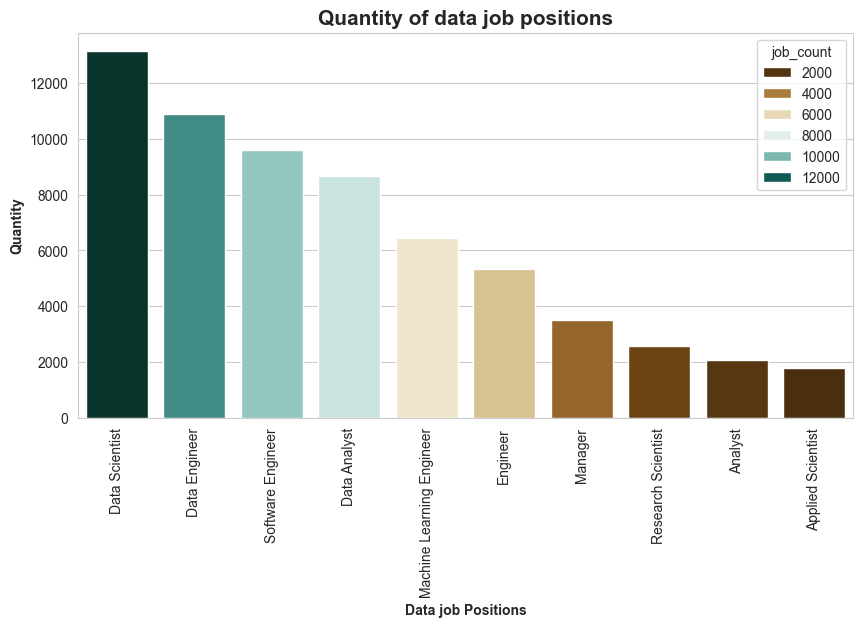

In [233]:
cur.execute("""
SELECT 
	s.job_title,
	COUNT(s.job_title) AS job_count
FROM	
	salaries s
GROUP BY	
	s.job_title
ORDER BY 
	COUNT(s.job_title) DESC
LIMIT
	10;
""")
rows = cur.fetchall()

for row in rows:
    print(row)
# Defining the query as a Dataframe
top_10_data_jobs = pd.DataFrame(rows, columns = ['job_title', 'job_count'])

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = "job_title", y = "job_count", data = top_10_data_jobs, hue = "job_count", palette = "BrBG")
plt.xticks(rotation = 90)
plt.ylabel("Quantity", weight="bold", size = 10)
plt.xlabel("Data job Positions", weight="bold", size = 10)
plt.title("Quantity of data job positions", weight = "bold", size = 15.0)
plt.show()

## Career Choice & Job Trends

### 1. Best Roles (part-time) for Beginners


### Ploting - best roles (part-time) for beginners

('EN', 'AI Software Engineer', 'PT', Decimal('117647.00'))
('EN', 'Analyst', 'PT', Decimal('100000.00'))
('EN', 'Data Scientist', 'PT', Decimal('92628.12'))
('EN', 'Applied Scientist', 'PT', Decimal('91545.00'))
('EN', 'Business Intelligence Engineer', 'PT', Decimal('90630.00'))
('EN', 'Data Analyst', 'PT', Decimal('77156.45'))
('EN', 'Business Intelligence Developer', 'PT', Decimal('66000.00'))
('EN', 'Software Engineer', 'PT', Decimal('63000.00'))
('EN', 'AI Developer', 'PT', Decimal('62962.50'))
('EN', 'BI Analyst', 'PT', Decimal('62400.00'))


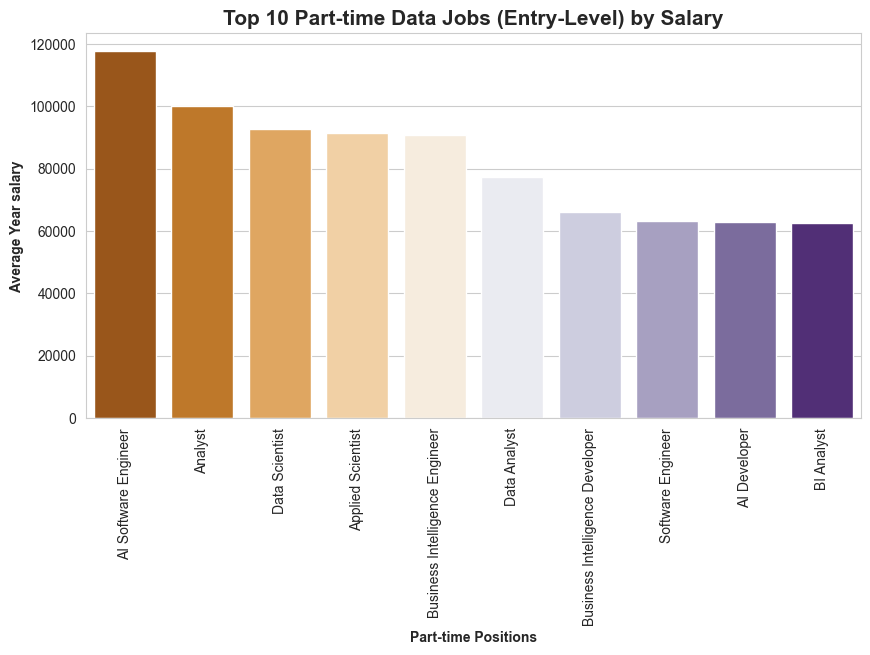

In [257]:
cur.execute("""
SELECT 
	s.experience_level,
	s.job_title,
	s.employment_type,
	ROUND(AVG(s.salary_in_usd),2) AS average_salary
FROM	
	salaries s
WHERE
	s.experience_level = 'EN'
	AND s.employment_type = 'PT'
GROUP BY
	s.job_title,
	s.experience_level,
	s.employment_type
ORDER BY
	AVG(s.salary_in_usd) DESC
LIMIT 10;
""")
rows = cur.fetchall()

for row in rows:
    print(row)
    
# Defining the query as a Dataframe
roles_pt = pd.DataFrame(rows, columns = ['experience_level', 'job_title', 'employment_type', 'average_salary'])

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = "job_title", y = "average_salary", data = roles_pt, palette = "PuOr", hue = "job_title")
plt.xticks(rotation = 90)
plt.ylabel("Average Year salary", weight="bold", size = 10)
plt.xlabel("Part-time Positions", weight="bold", size = 10)
plt.title("Top 10 Part-time Data Jobs (Entry-Level) by Salary", weight = "bold", size = 15.0)
plt.show()


### 1.2. Best Roles (full-time) for Beginners


### Ploting - Best roles full-time for beginners

('EN', 'Head of Data', 'FT', Decimal('240500.00'))
('EN', 'Engineering Manager', 'FT', Decimal('217800.00'))
('EN', 'AI Researcher', 'FT', Decimal('197513.33'))
('EN', 'Research Scientist', 'FT', Decimal('193336.69'))
('EN', 'Architect', 'FT', Decimal('181950.00'))
('EN', 'Machine Learning Model Engineer', 'FT', Decimal('180000.00'))
('EN', 'Quantitative Researcher', 'FT', Decimal('175000.00'))
('EN', 'Data Analytics Lead', 'FT', Decimal('165350.00'))
('EN', 'Applied Scientist', 'FT', Decimal('151404.48'))
('EN', 'Business Intelligence Lead', 'FT', Decimal('150747.50'))


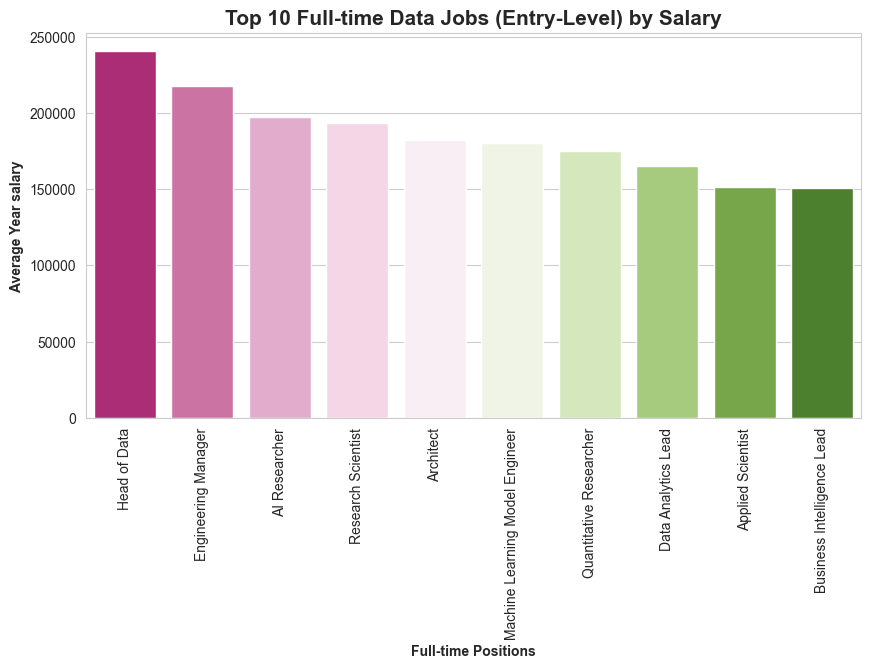

In [235]:
cur.execute("""
SELECT 
	s.experience_level,
	s.job_title,
	s.employment_type,
	ROUND(AVG(s.salary_in_usd),2) AS average_salary_ft
FROM	
	salaries s
WHERE
	s.experience_level = 'EN'
    AND s.employment_type = 'FT'
GROUP BY
	s.job_title,
	s.experience_level,
	s.employment_type
ORDER BY
	AVG(s.salary_in_usd) DESC
LIMIT 10;

""")
rows = cur.fetchall()

for row in rows:
    print(row)
    
# Defining the query as a Dataframe
roles_ft = pd.DataFrame(rows, columns = ['experience_level', 'job_title', 'employment_type', 'average_salary_ft'])

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.barplot(x = "job_title", y = "average_salary_ft", data = roles_ft, palette = "PiYG", hue = "job_title")
plt.xticks(rotation = 90)
plt.ylabel("Average Year salary", weight="bold", size = 10)
plt.xlabel("Full-time Positions", weight="bold", size = 10)
plt.title("Top 10 Full-time Data Jobs (Entry-Level) by Salary", weight = "bold", size = 15.0)
plt.show()

## 2. Remote, Hybrid, or In-Person Preferences

### Ploting - remote ratio

(36, 100, 2020)
(21, 50, 2020)
(18, 0, 2020)
(116, 100, 2021)
(73, 50, 2021)
(29, 0, 2021)
(887, 100, 2022)
(710, 0, 2022)
(63, 50, 2022)
(5775, 0, 2023)
(2674, 100, 2023)
(73, 50, 2023)
(50325, 0, 2024)
(11855, 100, 2024)
(54, 50, 2024)
(12723, 0, 2025)
(3140, 100, 2025)
(12, 50, 2025)


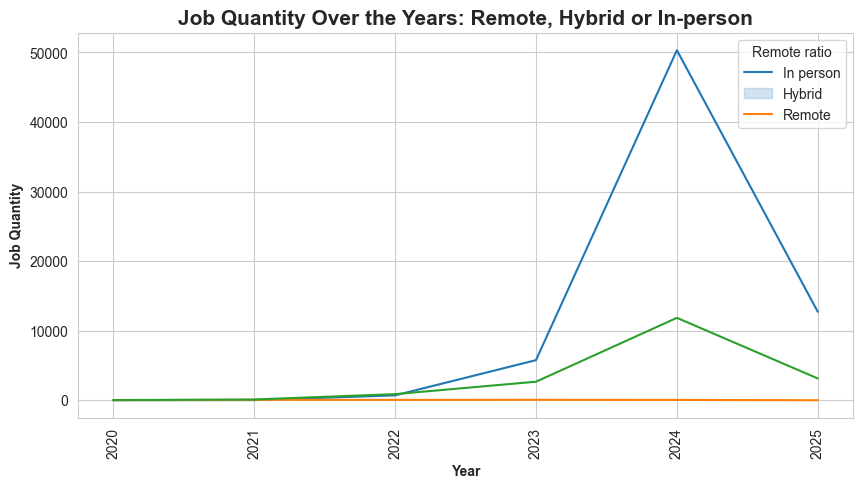

In [251]:
cur.execute("""
SELECT 
	COUNT(s.job_title) AS total_work_types,
	s.remote_ratio,
	s.work_year
FROM
	salaries s
GROUP BY
	s.remote_ratio,
	s.work_year
ORDER BY 
	s.work_year,
	COUNT(s.job_title) DESC
""")

rows = cur.fetchall()

for row in rows:
    print(row)

# Defining the query as a Dataframe
remote_ratio = pd.DataFrame(rows, columns = ['remote_ratio', 'total_work_types','work_year'])


plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.lineplot(x = "work_year", y = "remote_ratio", hue = "total_work_types", data = remote_ratio, markers = 'o', palette = "tab10")

plt.xticks(rotation = 90)
plt.xlabel("Year", weight="bold", size = 10)
plt.ylabel("Job Quantity", weight = "bold", size = 10)
plt.title("Job Quantity Over the Years: Remote, Hybrid or In-person", weight="bold", size = 15.0)
plt.legend(title = "Remote ratio", title_fontsize = '10', labels=["In person", "Hybrid", "Remote"])
plt.show()

## 2.2. Remote, Hybrid, or In-Person by company location
### Ploting - remote

(62935, 'US', 0)
(2400, 'CA', 0)
(2206, 'GB', 0)
(280, 'AU', 0)
(200, 'LT', 0)
(190, 'DE', 0)
(157, 'AT', 0)
(155, 'FR', 0)
(154, 'NL', 0)
(110, 'SK', 0)


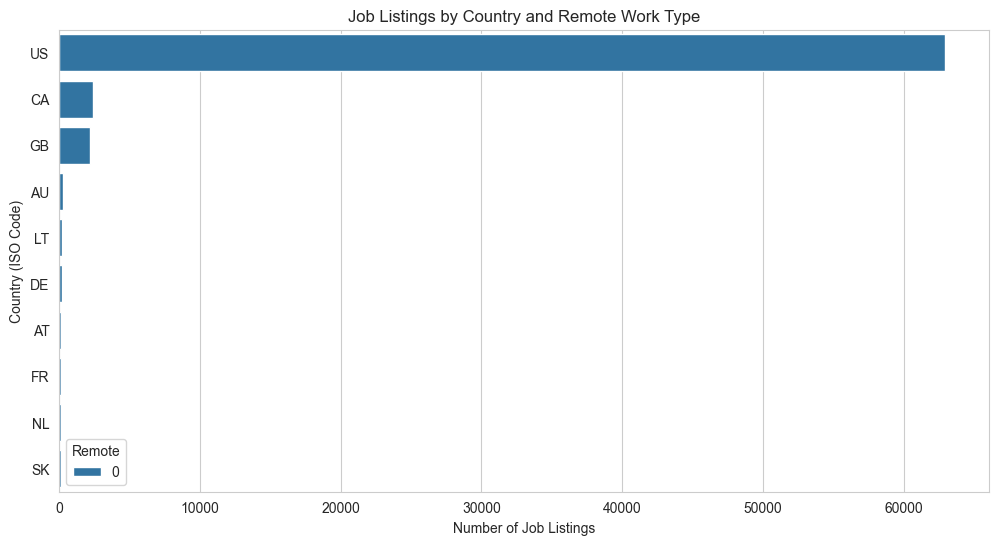

In [256]:
cur.execute("""
SELECT 
    COUNT(job_title) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
    s.remote_ratio = '0'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC,
    s.remote_ratio
LIMIT
    10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

remote_ratio = pd.DataFrame(rows, columns = ['total_work_types','company_location', 'remote_ratio'])

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_work_types", y = "company_location", hue = "remote_ratio", data = remote_ratio, palette = "tab10")
plt.xlabel("Number of Job Listings")
plt.ylabel("Country (ISO Code)")
plt.title("Job Listings by Country and Remote Work Type")
plt.legend(title = "Remote")
plt.show()

## 2.3. Remote, Hybrid, or In-Person by company location
### Ploting - Hybrid work

(55, 'US', 50)
(30, 'GB', 50)
(28, 'DE', 50)
(27, 'FR', 50)
(23, 'IN', 50)
(22, 'CA', 50)
(12, 'NL', 50)
(8, 'AU', 50)
(7, 'ES', 50)
(6, 'IT', 50)


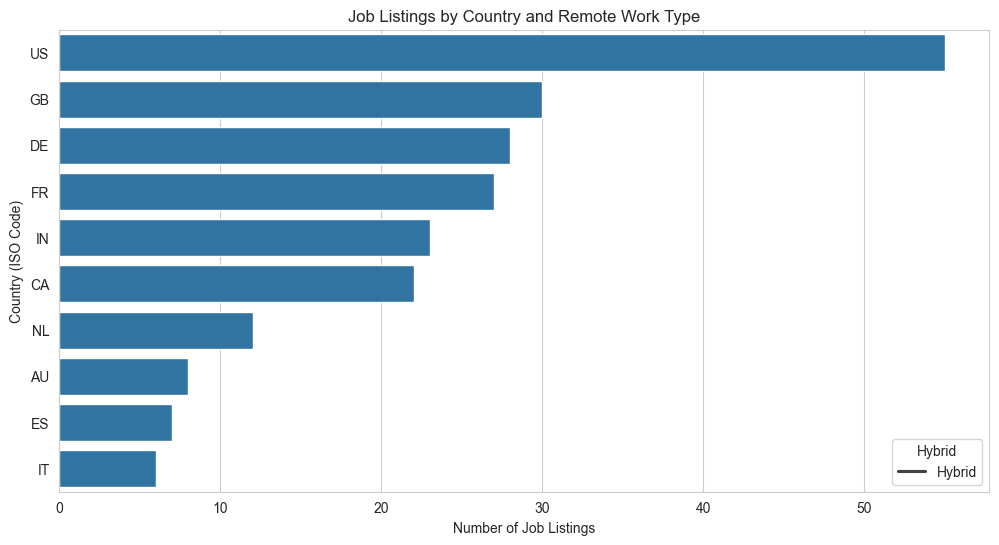

In [255]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '50'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
LIMIT 10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

hybrid_ratio = pd.DataFrame(rows, columns = ['total_work_types','company_location', 'remote_ratio'])

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_work_types", y = "company_location", hue = "remote_ratio", data = hybrid_ratio, palette = "tab10")
plt.xlabel("Number of Job Listings")
plt.ylabel("Country (ISO Code)")
plt.title("Job Listings by Country and Remote Work Type")
plt.legend(title = "Hybrid", labels = ["Hybrid"])
plt.show()

## 2.3. Remote, Hybrid, or In-Person by company location
### Ploting - IN-PERSON work

(62935, 'US', 0)
(2400, 'CA', 0)
(2206, 'GB', 0)
(280, 'AU', 0)
(200, 'LT', 0)
(190, 'DE', 0)
(157, 'AT', 0)
(155, 'FR', 0)
(154, 'NL', 0)
(110, 'SK', 0)


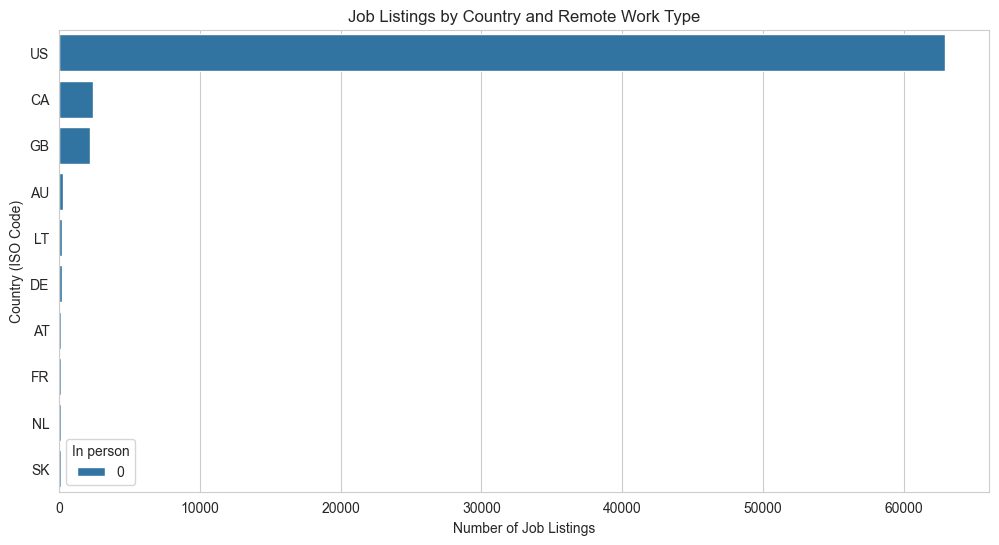

In [239]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '0'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
LIMIT 10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

inperson_ratio = pd.DataFrame(rows, columns = ['total_work_types','company_location', 'remote_ratio'])

plt.figure(figsize=(12, 6))
sns.barplot(x = "total_work_types", y = "company_location", hue = "remote_ratio", data = inperson_ratio, palette = "tab10")
plt.xlabel("Number of Job Listings")
plt.ylabel("Country (ISO Code)")
plt.title("Job Listings by Country and Remote Work Type")
plt.legend(title = "In person")
plt.show()

### Plot test - tree map

In [ ]:
inperson_ratio['label'] = inperson_ratio['company_location'] + "\n" + inperson_ratio['remote_ratio'].astype(str)

plt.figure(figsize=(12, 6))
squarify.plot(sizes = inperson_ratio["total_work_types"], label = inperson_ratio["label"], alpha = 0.8, color=sns.color_palette("tab10", len(inperson_ratio)))
plt.axis("off")
plt.title("Job Listings by Country and Remote Work Type")
plt.show()

## 3. Career Growth Potential
### Ploting - Career growth potential

('EN', Decimal('69840.67'), 2020)
('MI', Decimal('91870.94'), 2020)
('SE', Decimal('138648.89'), 2020)
('EX', Decimal('179958.25'), 2020)
('EN', Decimal('63463.07'), 2021)
('MI', Decimal('86818.39'), 2021)
('SE', Decimal('125989.75'), 2021)
('EX', Decimal('186128.00'), 2021)
('EN', Decimal('79464.09'), 2022)
('MI', Decimal('102745.58'), 2022)
('SE', Decimal('147768.97'), 2022)
('EX', Decimal('184738.09'), 2022)
('EN', Decimal('91036.20'), 2023)
('MI', Decimal('123773.66'), 2023)
('SE', Decimal('165421.03'), 2023)
('EX', Decimal('191006.75'), 2023)
('EN', Decimal('103436.13'), 2024)
('MI', Decimal('145683.71'), 2024)
('SE', Decimal('175706.64'), 2024)
('EX', Decimal('201624.67'), 2024)
('EN', Decimal('93730.56'), 2025)
('MI', Decimal('141752.10'), 2025)
('SE', Decimal('171353.63'), 2025)
('EX', Decimal('204190.57'), 2025)


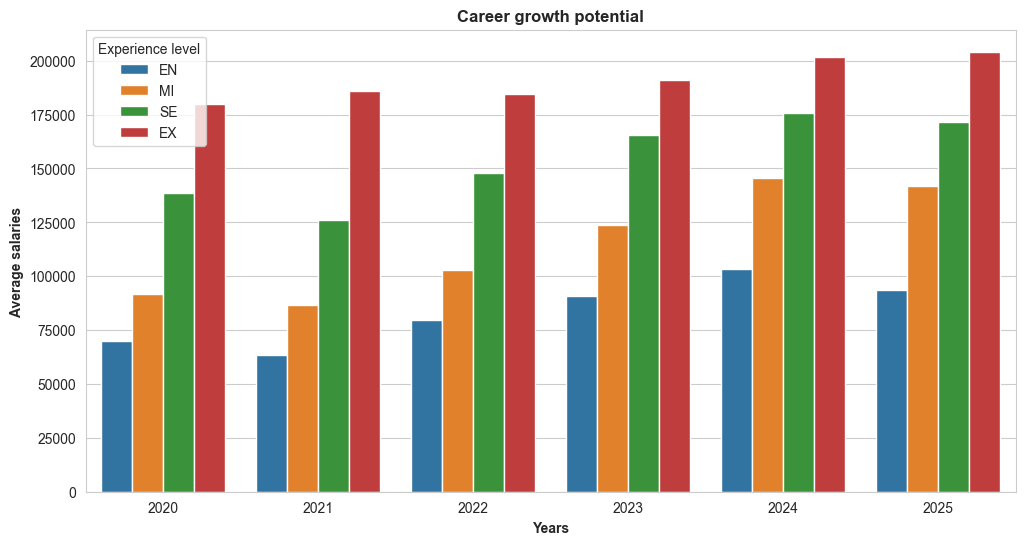

In [240]:
cur.execute("""
SELECT
	s.experience_level, 
	ROUND(AVG(s.salary_in_usd),2) AS average_salary,
	s.work_year
FROM
	salaries s
GROUP BY
	s.work_year,
	s.experience_level
ORDER BY
	s.work_year,
	CASE 
        WHEN s.experience_level = 'EN' THEN 1
        WHEN s.experience_level = 'MI' THEN 2
        WHEN s.experience_level = 'SE' THEN 3
        WHEN s.experience_level = 'EX' THEN 4
    END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)
    
growth = pd.DataFrame(rows, columns = ["experience_level","average_salary","work_year"])

plt.figure(figsize=(12, 6))
sns.barplot(x = "work_year", y = "average_salary", hue = "experience_level", data = growth, palette = "tab10")
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average salaries", weight = 'bold')
plt.title("Career growth potential", weight = 'bold')
plt.legend(title = "Experience level")
plt.show()


## 3.2. Career Growth Potential
### Data Scientists
### Ploting - Growth potential Data Scientists

('EN', Decimal('69840.67'), 2020)
('MI', Decimal('91870.94'), 2020)
('SE', Decimal('138648.89'), 2020)
('EX', Decimal('179958.25'), 2020)
('EN', Decimal('63463.07'), 2021)
('MI', Decimal('86818.39'), 2021)
('SE', Decimal('125989.75'), 2021)
('EX', Decimal('186128.00'), 2021)
('EN', Decimal('79464.09'), 2022)
('MI', Decimal('102745.58'), 2022)
('SE', Decimal('147768.97'), 2022)
('EX', Decimal('184738.09'), 2022)
('EN', Decimal('91036.20'), 2023)
('MI', Decimal('123773.66'), 2023)
('SE', Decimal('165421.03'), 2023)
('EX', Decimal('191006.75'), 2023)
('EN', Decimal('103436.13'), 2024)
('MI', Decimal('145683.71'), 2024)
('SE', Decimal('175706.64'), 2024)
('EX', Decimal('201624.67'), 2024)
('EN', Decimal('93730.56'), 2025)
('MI', Decimal('141752.10'), 2025)
('SE', Decimal('171353.63'), 2025)
('EX', Decimal('204190.57'), 2025)


<Figure size 1200x600 with 0 Axes>

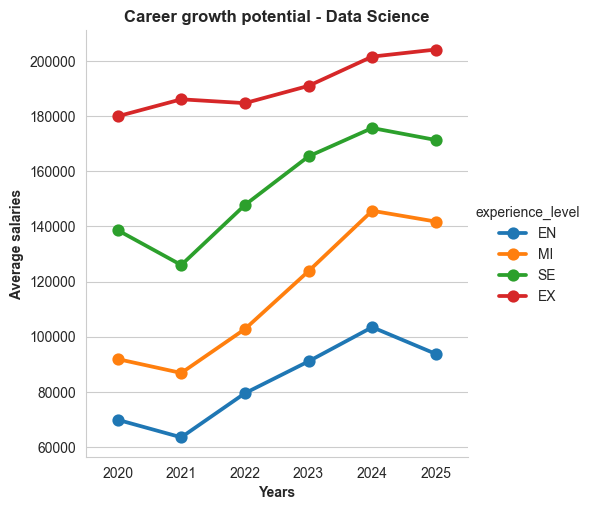

In [241]:
cur.execute("""
SELECT
	s.experience_level, 
	ROUND(AVG(s.salary_in_usd),2) AS average_salary,
	s.work_year
FROM
	salaries s
GROUP BY
	s.work_year,
	s.experience_level
ORDER BY
	s.work_year,
	CASE 
        WHEN s.experience_level = 'EN' THEN 1
        WHEN s.experience_level = 'MI' THEN 2
        WHEN s.experience_level = 'SE' THEN 3
        WHEN s.experience_level = 'EX' THEN 4
    END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)
    
growth_ds = pd.DataFrame(rows, columns = ["experience_level","average_salary","work_year"])

plt.figure(figsize=(12, 6))
sns.catplot(x = "work_year", y = "average_salary", hue = "experience_level", data = growth_ds, kind = "point", palette = "tab10")
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average salaries", weight = 'bold')
plt.title("Career growth potential - Data Science", weight = 'bold')
plt.show()

## 4. Comparing earnings across employment type and the most common employment type.

('PT', 233, Decimal('76034.682403433476'))
('FT', 88111, Decimal('157959.297556491244'))
('CT', 224, Decimal('96016.437500000000'))
('FL', 16, Decimal('50651.562500000000'))


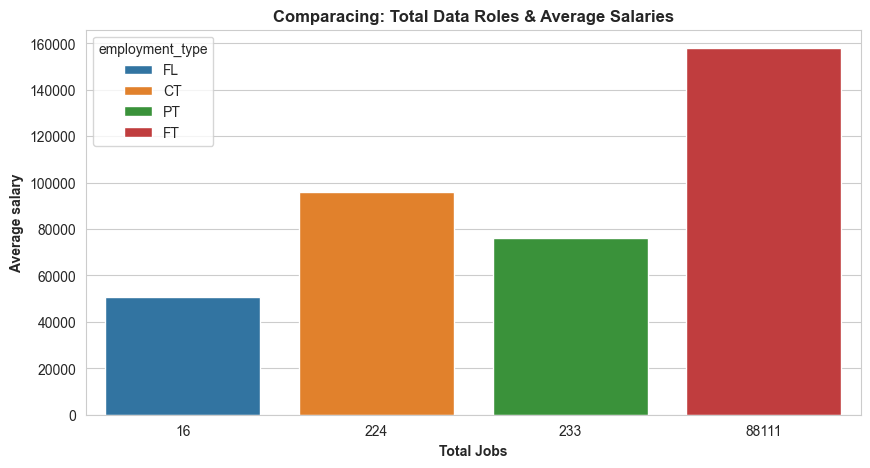

In [242]:
cur.execute("""
SELECT
	s.employment_type,
	COUNT(s.employment_type) AS total_jobs_types,
	AVG(s.salary_in_usd) AS avg_salary_job_type
FROM
	salaries s
GROUP BY
	s.employment_type
ORDER BY
	CASE 
        WHEN s.employment_type = 'PT' THEN 1
        WHEN s.employment_type = 'FT' THEN 2
        WHEN s.employment_type = 'CT' THEN 3
        WHEN s.employment_type = 'FL' THEN 4
	END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)
    
# Defining the query as a Dataframe
data_roles = pd.DataFrame(rows, columns = ['employment_type','total_jobs_types','avg_salary_job_type'])

plt.figure(figsize=(10, 5))
sns.barplot(x = "total_jobs_types", y = "avg_salary_job_type", hue = 'employment_type',data = data_roles, palette = "tab10")
plt.ylabel("Average salary",  weight = 'bold')
plt.xlabel("Total Jobs", weight = 'bold')
plt.title("Comparacing: Total Data Roles & Average Salaries",  weight = 'bold')
plt.show()

## 4.2. Comparing earnings across employment_type and the most common employment type.
### Data Scientists

('PT', 34, Decimal('90971.09'))
('FT', 13108, Decimal('157486.84'))
('CT', 12, Decimal('107972.25'))
('FL', 2, Decimal('60500.00'))


<Figure size 1000x500 with 0 Axes>

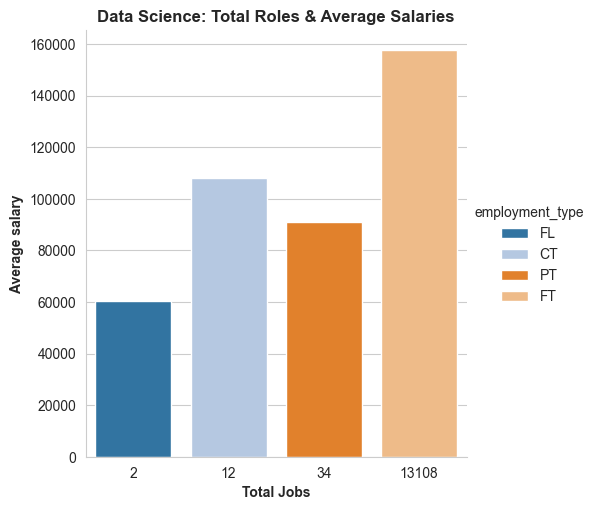

In [248]:
cur.execute("""
SELECT
	s.employment_type,
	COUNT(s.employment_type) AS total_jobs_types,
	ROUND(AVG(s.salary_in_usd),2) AS avg_salary_job_type
FROM
	salaries s
WHERE 
	s.job_title = 'Data Scientist'
GROUP BY
	s.employment_type
ORDER BY
	CASE 
        WHEN s.employment_type = 'PT' THEN 1
        WHEN s.employment_type = 'FT' THEN 2
        WHEN s.employment_type = 'CT' THEN 3
        WHEN s.employment_type = 'FL' THEN 4
	END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)

# Defining the query as a Dataframe
ds_role_salary = pd.DataFrame(rows, columns = ['employment_type','total_jobs_types','avg_salary_job_type'])

plt.figure(figsize=(10, 5))
sns.catplot(x = "total_jobs_types", y = "avg_salary_job_type", hue = 'employment_type',data = ds_role_salary, kind = "bar", palette = "tab20")
plt.ylabel("Average salary",  weight = 'bold')
plt.xlabel("Total Jobs", weight = 'bold')
plt.title("Data Science: Total Roles & Average Salaries",  weight = 'bold')
plt.show()

In [46]:
cur.close()
conn.close()
print("Connection closed")

Connection closed
